In [1]:
from AutoAlpha import autoalpha as aa
from AutoAlpha.utils.show_info_in_traning import *
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm
# from pympler.asizeof import asizeof
from copy import deepcopy

In [2]:
with open("../data/us_data_2017_2023.pkl", "rb") as f:
    data_X = pickle.load(f)
with open("../data/us_return_2017_2023.pkl", "rb") as f:
    data_y = pickle.load(f)
print(data_X["open"].shape)
print(data_y.shape)

(1449, 503)
(1449, 503)


In [3]:
# 需要分割数据集时
x = {}
for idx, dat in data_X.items():
    x[idx] = dat.values
y = data_y.values
dataset = aa.Dataset(x, y)
aa.set_dataset(dataset=dataset)

In [4]:
aa.set_use_parallel(True)
aa.set_d_ls([2, 3, 5, 7, 10, 15, 20])
aa.set_balance_mode(True)
aa.set_tournament_size(1)
aa.set_metric(aa.WQF)
aa.set_low_memory(False)
print(aa.get_n_jobs())

64


1645


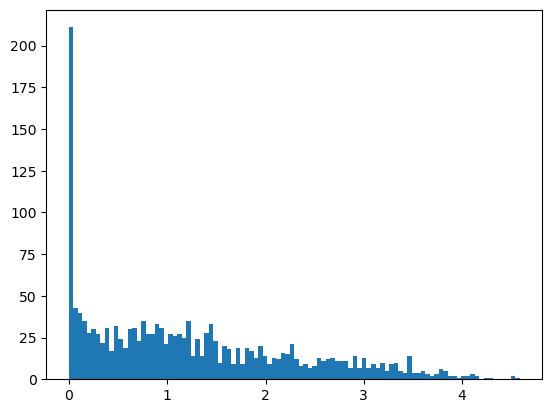

In [5]:
program3 = load_programs("2023_05_15/program3_1_4_corr.pkl")
program3 = aa.sort_programs(program3)
print(len(program3))
show_distribution(program3)

In [6]:
program3 = aa.corr_filter(program3)
print(len(program3))

1645


In [7]:
program_best = program3[: 100]

In [8]:
program_best

[max(ts_corr(-ts_covariance(high, volume, 2), -sigmoid(high), 10), -ts_regbeta(ts_covariance(returns, low, 7), -sigmoid(low), 5)),
 min(min(-ts_returns(low, 5), -sigmoid(vwap)), min(ts_regbeta(high, low, 15), -sigmoid(vwap))),
 max(-div(-ts_regbeta(vwap, returns, 3), -ts_product(high, 15)), ts_corr(-ts_covariance(volume, low, 2), -sigmoid(high), 10)),
 -ts_max(-ts_regbeta(-ts_product(vwap, 15), ts_regbeta(high, open, 7), 20), 10),
 max(-div(-ts_regbeta(vwap, returns, 3), -ts_product(high, 15)), ts_corr(-ts_covariance(returns, returns, 2), -sigmoid(close), 10)),
 -add(div(ts_delay(adv20, 7), ts_product(vwap, 15)), min(-ts_returns(low, 5), -sigmoid(vwap))),
 -add(min(ts_regbeta(volume, adv20, 15), -sigmoid(vwap)), min(-ts_returns(low, 5), -sigmoid(vwap))),
 -ts_min(min(-ts_returns(low, 5), -sigmoid(vwap)), 10),
 -ts_min(-ts_covariance(ts_regbeta(adv20, returns, 3), -sigmoid(low), 20), 60),
 ts_std_dev(ts_corr(-ts_covariance(high, volume, 2), -sigmoid(high), 10), 60),
 max(div(ts_delay(re

In [9]:
print(data_X["returns"].index)

Index(['2017-07-11', '2017-07-12', '2017-07-13', '2017-07-14', '2017-07-17',
       '2017-07-18', '2017-07-19', '2017-07-20', '2017-07-21', '2017-07-24',
       ...
       '2023-03-29', '2023-03-30', '2023-03-31', '2023-04-03', '2023-04-04',
       '2023-04-05', '2023-04-06', '2023-04-10', '2023-04-11', '2023-04-12'],
      dtype='object', name='trade_date', length=1449)


In [27]:
data_y

stk_id,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
trade_date,,,,,,,,,,,,,,,,,,,,,
2017-07-11,0.015987,0.043358,0.005568,0.001573,0.014706,0.014211,0.014330,0.004071,0.014369,0.020849,...,0.007791,NaN,0.005573,0.004860,0.019996,0.008202,-0.001571,-0.001490,-0.010844,0.006129
2017-07-12,0.008310,0.000190,0.027006,0.016018,0.016945,-0.003353,-0.008829,0.001248,0.002833,-0.005826,...,-0.002288,NaN,0.000489,0.007738,0.010105,-0.010795,0.021532,-0.003382,0.005615,0.008006
2017-07-13,0.005436,0.007778,-0.013423,0.009892,0.010524,0.000721,0.021125,-0.001558,0.009511,0.007583,...,-0.036053,NaN,0.004073,0.003679,0.005202,0.002847,0.029185,0.019166,-0.007445,0.005352
2017-07-14,0.000698,-0.006589,-0.003234,0.003979,-0.008462,-0.003242,-0.003988,0.004056,-0.002799,0.001642,...,-0.004675,NaN,-0.006490,-0.000797,0.012739,-0.000315,0.001418,-0.013516,-0.010179,-0.004465
2017-07-17,-0.005577,-0.013644,-0.016111,0.003963,-0.010066,-0.016745,-0.000250,0.002486,0.008606,0.010178,...,0.030490,NaN,-0.004410,-0.000957,-0.006289,0.003155,-0.011563,-0.001986,-0.007037,-0.011040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-05,-0.000434,0.008639,0.004043,0.005496,0.004708,-0.006035,0.006943,0.005103,0.001320,-0.003717,...,0.004788,0.002109,-0.016583,0.007902,-0.000100,0.001213,0.004510,0.000366,0.026546,0.007712
2023-04-06,-0.000072,0.009993,-0.002517,-0.015972,-0.001687,0.000180,-0.011779,-0.004207,-0.000071,-0.011429,...,0.007331,-0.007156,-0.004433,0.006070,0.012867,-0.007570,-0.007897,0.005662,0.016332,0.011449
2023-04-10,0.003623,0.012014,0.015056,-0.007591,0.000626,0.001022,-0.003973,0.005244,0.016574,-0.013661,...,-0.017649,0.003957,0.007072,0.024887,0.011620,0.003585,0.025205,0.006855,0.008035,0.001994


In [12]:
len_list = []
factor_result_list = []
for program in tqdm(program_best):
    res = program.execute(dataset=dataset)
    len_list.append(len(res))
    factor_result_list.append(res)

100%|██████████| 100/100 [00:51<00:00,  1.94it/s]


In [13]:
for idx, res in enumerate(factor_result_list):
    factor_result_list[idx] = res[len(res) - min(len_list) : ]

In [14]:
set([len(res) for res in factor_result_list])

{1369}

In [28]:
factor_df_list = []
date_idx = data_y.index
columns = data_y.columns
for fac in factor_result_list:
    fac_df = pd.DataFrame(data=fac, index=date_idx[len(date_idx) - len(fac): ], columns=columns)
    factor_df_list.append(fac_df)
    # print(fac_df)

In [29]:
with open("2023_05_15/factor_results.pkl", "wb") as f:
    pickle.dump(factor_result_list, f)

In [30]:
with open("2023_05_15/factor_df_list.pkl", "wb") as f:
    pickle.dump(factor_df_list, f)